In [2]:
import matplotlib
%matplotlib inline
from pylab import *
import caesar
import h5py, os, sys
import yt, pickle
from scipy.optimize import curve_fit
from scipy.stats import binned_statistic as bst
from scipy.stats import binned_statistic_2d as bst2
from scipy.signal import savgol_filter as sgf

matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18

safecolor={
    'silver':"#c0c0c0",
    'gray':"#808080",
    'black':"#000000",
    'red':"#ff0000",
    'maroon':"#800000",
    'yellow':"#ffff00",
    'olive':"#707030",
    'lime':"#00ee00",
    'green':"#009000",
    'aqua':"#00eeee",
    'teal':"#00a0a0",
    'blue':"#0000ff",
    'nave':"#000080",
    'fuchsia':"#ff00ff",
    'purple':"#900090"
}

# Calculate formation time halo -- bcg

In [3]:
Gizmo_HMevo=np.load('../Halo_mass_function_mass-difference/GIZMO/Progenitor-center-cluster-information.npy')[:,:,3] # Halo mass M200 evolution 

In [95]:
Gizmo_HMevo.shape

(324, 129)

In [4]:
G3X_HMevo=np.load('../Halo_mass_function_mass-difference/GadgetX/Progenitor-center-cluster-information.npy')[:,:,3]

In [4]:
sn_a_red=np.loadtxt('../redshifts.txt')
sn_a_red.shape

(129, 3)

In [33]:
sn_a_red[90:,2]

array([1.31996477, 1.26901174, 1.21917772, 1.17043829, 1.12276924,
       1.0761472 , 1.03054917, 0.9859525 , 0.94233531, 0.89967608,
       0.85795379, 0.81714785, 0.77723807, 0.7382049 , 0.70002896,
       0.66269147, 0.62807584, 0.59231865, 0.55734682, 0.52314305,
       0.48969048, 0.45697263, 0.42497337, 0.39367691, 0.36306778,
       0.33313093, 0.30385157, 0.2752153 , 0.24720792, 0.22052877,
       0.19372249, 0.16750494, 0.14119609, 0.11613217, 0.09225687,
       0.06826779, 0.04480559, 0.02185869, 0.        ])

### BCG stellar mass evolution -- see Get_BCG_Mg_progen.py for the calcualtion

In [5]:
Gizmo_BCGMevo=np.load('GIZMO_BCG_Mg_progen.npy') #324X129

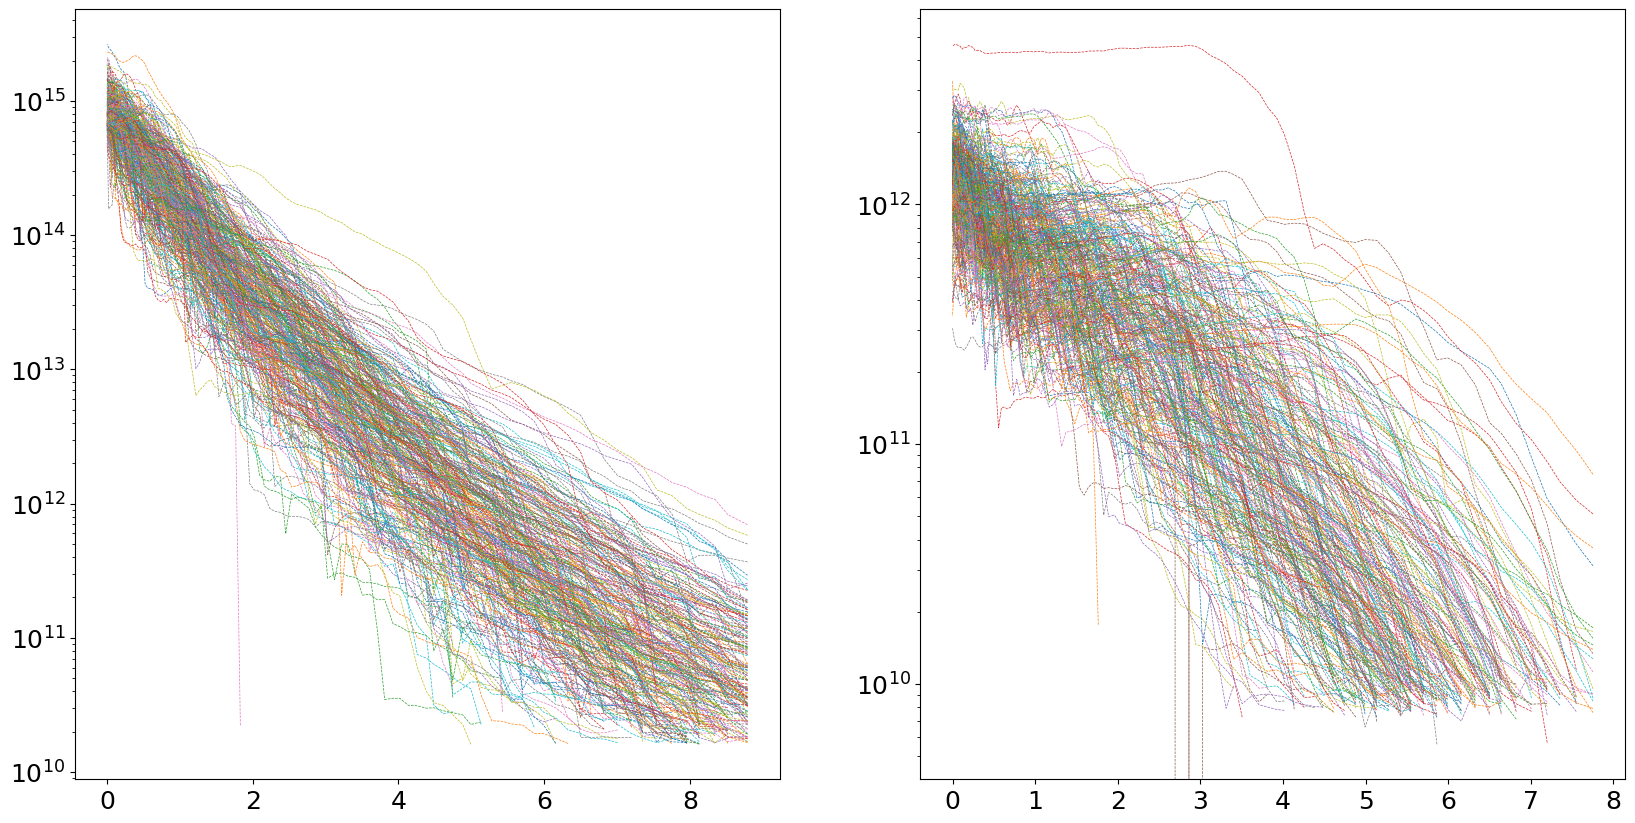

In [46]:
fig=figure(figsize=(20,10))
subplot(121)
for i in range(324):
    ids=Gizmo_HMevo[i,:]>0
    plot(sn_a_red[ids,2],Gizmo_HMevo[i,ids],'--',lw=0.5)
yscale('log')
subplot(122)
for i in range(324):
    if len(Gizmo_BCGMevo[i,90:][Gizmo_BCGMevo[i,90:]<1e11]):
        continue
    ids=Gizmo_BCGMevo[i,:]>1e9
#     if len(Gizmo_BCGMevo[i,ids])>11:
#     plot(sn_a_red[ids,2],Gizmo_BCGMevo[i,ids],'--',lw=0.5)
    plot(sn_a_red[ids,2],sgf(Gizmo_BCGMevo[i,ids],5,2),'--',lw=0.5)
yscale('log')


In [17]:
sn_a_red[112],np.log10(Gizmo_BCGMevo[:,127])

(array([112.        ,   0.7017675 ,   0.42497337]),
 array([12.188554 , 12.136634 , 12.15291  , 12.219462 , 12.202575 ,
        12.019095 , 12.427357 , 12.027591 , 12.484981 , 12.099931 ,
        11.937422 , 12.529543 , 11.887049 , 11.947441 , 12.119636 ,
        12.181819 , 12.017879 , 12.341954 , 12.190744 , 12.294552 ,
        12.320349 , 12.188608 , 12.057515 , 12.406842 , 12.163114 ,
        12.398141 , 12.221282 , 12.195282 , 12.428847 , 12.371783 ,
        11.96952  , 12.11484  , 12.125594 , 12.077968 , 12.294206 ,
        12.114604 , 12.081484 , 12.100431 , 12.429564 , 12.053645 ,
        12.434471 , 12.12949  , 12.148706 , 12.130576 , 12.107963 ,
        12.379464 , 11.752935 , 12.262181 , 12.148075 , 12.210535 ,
        11.861638 , 12.321144 , 12.099426 , 12.188051 , 12.022856 ,
        12.248771 , 12.0319805, 12.263704 , 12.1388   , 12.1001215,
        12.081946 , 11.744818 , 12.0931225, 12.196089 , 12.15536  ,
        12.089361 , 12.339215 , 12.331832 , 12.264616 , 12.24018

In [6]:
# Calcluate the z_f(halo, M*)
from scipy.signal import savgol_filter as sgf

In [7]:
recal=False

if recal:
    Hfz=np.zeros(324)
    for i in range(324):
        hm=Gizmo_HMevo[i,:]
        idm=hm>1e9
        red=sn_a_red[idm,2]
        hm=hm[idm]
        hm=np.log10(hm)
        sm=sgf(hm,19,2)

    #     ssm=np.array([sm[idgt[0]-1], sm[idgt[0]]])
    #     idsm=np.argsort(ssm)
    #     ssm=ssm[idsm]
        Hfz[i]=np.interp(sm[-1]-np.log10(2),sm, red)
else:
    Hfz=np.array([0.25722055, 0.73236462, 0.45147952, 0.08129574, 0.06992654,
       0.41200675, 0.6427022 , 0.12885348, 0.79273841, 0.09491416,
       0.495226  , 0.24301432, 0.37094936, 0.09761831, 0.23891972,
       0.1089866 , 0.82095253, 0.91706719, 0.402369  , 0.48055444,
       0.609386  , 0.64002037, 0.29380472, 0.50480557, 0.84101079,
       0.24802944, 0.74063751, 0.35464695, 0.63944756, 0.7966971 ,
       0.48223154, 0.29160215, 0.61020951, 0.21044008, 0.55389228,
       0.69912471, 0.30977367, 0.96790778, 0.7199364 , 0.46466232,
       0.80038944, 0.26888447, 0.49102514, 0.53264165, 0.61838701,
       0.76083105, 0.5323911 , 0.65030234, 0.13257378, 0.39359099,
       0.10110356, 0.8561357 , 0.64058501, 0.1583347 , 0.45285087,
       0.57320004, 0.22429199, 0.50670394, 0.76555363, 0.14801627,
       0.13082285, 0.05590363, 0.29985683, 0.26196016, 0.32963831,
       0.67184827, 0.72120514, 0.56573507, 0.70293968, 0.62969238,
       0.55742471, 0.71498507, 0.23053981, 0.28736581, 0.86619273,
       0.26196214, 0.39193268, 0.40832005, 0.65855544, 0.69729822,
       0.21523359, 0.54590625, 0.54567065, 0.7712115 , 0.37569763,
       0.17912327, 0.14245583, 0.5139697 , 0.37582863, 0.33106435,
       0.4102615 , 0.64844322, 0.22880996, 0.24138792, 0.88975014,
       0.61725207, 0.68120181, 0.15996658, 0.79137408, 0.07564403,
       0.42622861, 0.74062638, 0.54703588, 0.53587566, 0.44757007,
       0.29362942, 0.8145534 , 0.19618321, 0.16202963, 0.37106802,
       0.53242215, 0.42060914, 0.28961975, 0.2188048 , 0.78414108,
       0.13403617, 0.49694145, 0.24902301, 0.4731098 , 0.97084301,
       0.16149809, 0.2391332 , 0.33620809, 0.5619046 , 0.23150652,
       0.59298073, 0.76224124, 0.83388503, 1.11327987, 0.65540511,
       0.30149984, 0.50044866, 0.11474115, 0.49814674, 0.94568646,
       0.08552565, 1.01381224, 0.54190355, 0.17341682, 0.176124  ,
       0.914896  , 0.48525235, 0.27345996, 0.16121296, 0.19338134,
       0.67959292, 0.37490251, 0.36686533, 0.59220707, 0.19396296,
       0.46991268, 0.89875867, 0.90332401, 0.47390591, 1.03816633,
       0.86252883, 0.3780158 , 0.62989273, 0.76524006, 0.86401861,
       0.26491105, 0.60614765, 0.65987369, 0.15304735, 0.80456481,
       0.42966677, 0.38407962, 0.26320189, 0.15606597, 0.13008942,
       0.30125252, 0.79004186, 0.23728742, 0.31430902, 0.36315446,
       0.42619992, 0.14480371, 0.30876818, 0.63447676, 0.19584933,
       1.02777423, 0.32213466, 0.20267797, 0.31361068, 0.2198554 ,
       0.58600929, 0.45111714, 0.24497823, 0.78624391, 0.11297708,
       0.56154447, 0.0525707 , 0.09563715, 0.70955811, 0.78812399,
       0.53062878, 0.50572926, 0.55032071, 0.40304282, 0.57122745,
       0.14990743, 0.67432364, 0.36362711, 0.22079108, 0.48240414,
       0.79340171, 0.54310999, 0.23512634, 0.35215832, 0.36910349,
       0.73732839, 0.30062762, 0.55613792, 0.27716603, 0.15413898,
       0.8729803 , 0.53959521, 0.59070319, 0.67527302, 0.26426125,
       1.18613987, 0.20827329, 1.1356996 , 0.55315408, 0.7524231 ,
       0.72184427, 0.4615783 , 0.05773269, 0.49344038, 0.27927847,
       0.75728712, 0.47691271, 0.54730259, 0.68644531, 0.11611883,
       0.20046392, 0.2302362 , 0.62982381, 0.59809396, 0.45325209,
       0.39855362, 0.39857684, 0.72044307, 0.46547328, 0.57437793,
       0.6473156 , 0.22152293, 0.57462758, 0.64379332, 0.64080722,
       0.95064078, 0.35496024, 0.123204  , 1.05007335, 0.49212551,
       0.62396654, 0.574936  , 0.59659286, 0.55323859, 0.7365931 ,
       0.64145181, 0.12563798, 0.74896031, 0.10684578, 0.21452697,
       0.76445958, 0.65064145, 0.65713378, 0.87821682, 0.33213357,
       0.65663519, 0.07102773, 0.25077939, 1.03877811, 0.11628672,
       1.11188203, 0.26272818, 0.35968974, 0.17591242, 0.3437707 ,
       0.30253711, 1.37311798, 0.10192206, 0.31434407, 1.01290449,
       0.58266167, 0.50458792, 0.74363266, 0.21237563, 0.67625876,
       0.50856938, 0.31751941, 0.84295265, 0.44592854, 1.03415858,
       0.15241522, 0.68868191, 0.66677955, 1.15922942, 0.18367027,
       0.34677978, 0.23175126, 0.09600265, 0.05134597, 0.65698368,
       1.00647821, 0.42088318, 0.12949603, 0.20444569, 0.4375318 ,
       0.35599079, 0.68019365, 0.41732278, 0.44976576, 0.24053148,
       0.1501617 , 0.54456407, 0.53864927, 0.55667959, 0.48302478,
       0.51044168, 0.64509493, 0.28158036, 1.08369052])

In [7]:
if recal:
    Gfz=np.zeros(324)-1
    for i in range(324):
        if len(Gizmo_BCGMevo[i,90:][Gizmo_BCGMevo[i,90:]<1e11]):
            continue
        hm=Gizmo_BCGMevo[i,:]
        idm=hm>1e6
        red=sn_a_red[idm,2]
        hm=hm[idm]
        hm=np.log10(hm)
        if len(hm)>7:
            sm=sgf(hm,7,3)

    #     ssm=np.array([sm[idgt[0]-1], sm[idgt[0]]])
    #     idsm=np.argsort(ssm)
    #     ssm=ssm[idsm]
            Gfz[i]=np.interp(hm[-1]-np.log10(2),sm, red)
else:
    Gfz = np.array([ 1.01661969,  1.53734587,  1.41309334,  0.53755366,  0.6453145 ,
        4.07099342,  1.00681301,  2.19066951,  2.01785903,  2.7275783 ,
       -1.        ,  0.70663698,  0.02182442,  0.59374508,  0.44152927,
        1.62619559,  1.5908522 , -1.        ,  0.57521193,  1.23318201,
        0.27168357,  2.10955501,  0.73601674,  0.03461994,  0.33248049,
        1.324865  ,  1.32045414,  1.0865447 ,  2.20081134,  1.01281284,
        1.97878991,  2.59879776,  1.20135867,  3.09048608,  1.18197862,
        0.43619155,  2.78559627,  5.3199623 ,  0.63068407,  0.22826311,
        1.62710832,  1.27150144,  0.07133562,  3.09865956,  0.85154923,
        2.25223398,  0.05468176,  2.32873856,  0.52930798,  1.05444093,
        1.05737501,  0.45050949,  0.70267027,  0.26264591,  0.83076358,
        2.93330879,  0.22510876,  1.50122372,  1.7311248 ,  0.9248888 ,
        1.0430869 ,  2.69100469,  3.45767527,  0.50497948,  2.46393007,
        0.7287128 ,  1.8358582 ,  0.26901495,  1.18213621,  0.47989521,
       -1.        ,  0.89382953,  0.31077678,  2.4618509 ,  1.49985323,
        0.81952939,  1.18213323,  1.25287142,  1.1180187 ,  0.84523724,
        1.00409603,  0.95791972,  1.52254184, -1.        ,  1.15474046,
        2.73066972,  2.51400983,  0.64673341,  1.42741828,  0.69604877,
        0.98775054,  2.21927766,  1.86338984,  0.36705381,  1.48804679,
        0.53079643,  0.60842512,  1.19315805,  0.5135026 ,  0.63651126,
        0.83961321,  0.50372267,  0.52119105,  2.086517  ,  0.15803561,
        1.74015921,  1.00371187,  1.11406842,  1.05770717,  0.28360594,
        1.55999294,  0.53274525,  0.20886378,  0.31195636,  0.67960567,
        0.47588582,  0.41767779,  1.92771704, -1.        ,  2.40883102,
        0.60521958,  1.269388  ,  0.70381618,  0.89961862,  1.29763906,
        0.68178805,  1.11815196,  1.67332075,  3.93836026,  0.29077258,
        1.89012538,  1.66480948,  0.72668467,  0.2307569 ,  0.9907146 ,
        1.31570561,  5.28982183,  1.56475438,  0.9645501 ,  0.79513236,
       -1.        ,  1.78181618,  0.05156128,  0.97862637,  2.82977554,
        0.97804913,  1.24181577,  2.37588658,  1.02559924,  0.41980963,
        0.68326364,  0.40549733,  2.31887071,  1.27190525,  1.24640754,
        1.14480616,  1.34153282,  0.44398352,  0.31174775,  1.51350443,
        1.16344067,  0.47288754,  0.6361544 ,  1.23133575,  1.46200898,
        2.18697186,  0.41049826,  0.59643644,  0.403192  ,  0.678788  ,
        2.11673684,  0.6419839 ,  2.49449726,  2.23684304,  0.33907738,
        1.78573615,  1.77839568,  0.80798576,  3.07920307,  2.58498673,
        0.87236277,  0.0657489 ,  2.63986679,  4.50913165,  0.55247961,
        2.13015977,  0.37774007,  1.00478227,  0.60762284,  4.26944601,
        3.47531153,  0.61958176,  2.6545919 ,  0.75208976,  0.40073569,
        3.43087019, -1.        ,  0.05392186,  0.21987564,  1.13147248,
        0.76276333,  0.83019422,  0.36032128,  0.92118163,  0.78712066,
        1.58582722,  1.62534972, -1.        ,  0.79799303,  2.26210762,
        0.44720661,  0.65021492,  0.32785384, -1.        ,  2.60404553,
       -1.        , -1.        , -1.        ,  0.34735727,  0.74770983,
        1.79186221,  2.46582113,  0.62248485,  0.66541941,  3.61188869,
        0.85752704,  0.43654204,  0.67742113,  1.2537395 ,  1.49770773,
        0.40315004,  0.78793035,  1.61147734,  4.48218993, -1.        ,
        1.57942005,  1.68212424,  2.33651431,  1.54473555,  0.58324416,
        1.205611  , -1.        ,  0.76063394, -1.        ,  1.88279575,
        0.65475186,  1.33407133,  0.72930079,  1.40999003,  0.34410131,
        0.48120375,  1.19270471,  0.81354092,  1.11440621,  0.62009068,
        0.89711383,  0.90071533,  2.02481461,  0.36447236,  0.82023605,
        2.2906087 ,  1.17540101,  2.25886837,  1.29902911,  0.44984645,
        0.84445752,  1.27407633,  0.47020331,  0.59948944,  0.69107266,
        0.78090374,  2.49414771,  1.00061736,  2.31289439,  0.30831206,
        1.06525296,  1.28889102,  0.65274034,  1.5122315 ,  0.48527851,
        1.85386173,  1.56991402,  2.6497826 ,  1.78414574,  1.76844158,
        0.43622332,  1.74834959,  0.53942868,  4.58296314,  1.18344212,
        0.81709263,  3.43295086,  0.70570141,  1.33287288,  1.46698579,
        0.39686779,  0.63117473,  0.99867063,  0.73840747,  1.18117321,
        0.63792906,  0.31997692,  0.79114514,  0.61226786, -1.        ,
        0.76137724,  3.27655115,  1.88994942, -1.        ,  1.63366427,
        0.71434028,  0.43921487, -1.        , -1.        ,  0.47465192,
        0.57707676,  1.25448486,  1.17180089,  1.28640976,  0.73063043,
        1.00206245,  0.61358564,  1.61721027,  2.48507612])

In [14]:
# GIZMO-bcg age
GZCshr=np.load('data/GZS-galaxies-info-caesar_nodust.npy')
# region, mass, central, u, g, r, i, metal, age mass-weighted, SFR, SFR_100 distance to matched center[kpc/h]
GZCshr=GZCshr[GZCshr[:,2]==1,:]
GZCshr.shape

(324, 12)

In [8]:
# Calc GadgetX halo formation time
if recal:
    GHfz=np.zeros(324)
    for i in range(324):
        hm=G3X_HMevo[i,:]
        idm=hm>1e9
        red=sn_a_red[idm,2]
        hm=hm[idm]
        hm=np.log10(hm)
        sm=sgf(hm,19,2)
        GHfz[i]=np.interp(sm[-1]-np.log10(2),sm, red)
else:
    GHfz=np.array([0.2622114 , 0.73712097, 0.4108314 , 0.08036538, 0.06820868,
       0.40735545, 0.64553757, 0.10632719, 0.80665202, 0.08986794,
       0.49229827, 0.24662898, 0.37927577, 0.11393211, 0.23366837,
       0.1123627 , 0.81466377, 0.90673969, 0.38699916, 0.46672634,
       0.61081284, 0.63810499, 0.2927694 , 0.50865534, 0.83965153,
       0.26409969, 0.70736229, 0.36139748, 0.64230049, 0.79584209,
       0.48275705, 0.30646453, 0.60674084, 0.22428267, 0.56915417,
       0.69970639, 0.30137936, 0.95477484, 0.72531536, 0.46200007,
       0.79885479, 0.2768508 , 0.48599314, 0.53056209, 0.61953504,
       0.78000621, 0.54001385, 0.66288575, 0.10550942, 0.39976823,
       0.1065959 , 0.86640599, 0.55554201, 0.15943295, 0.45582359,
       0.5627456 , 0.2250435 , 0.52163153, 0.76348912, 0.15655527,
       0.12560172, 0.05720397, 0.3164445 , 0.26923051, 0.34358677,
       0.66219692, 0.71512346, 0.59612915, 0.70642764, 0.61565346,
       0.55786867, 0.69328169, 0.23824198, 0.41068012, 0.89434032,
       0.26662111, 0.38079147, 0.40089975, 0.66425032, 0.70221862,
       0.21000591, 0.55518339, 0.54558625, 0.76766662, 0.3813398 ,
       0.18327446, 0.13793873, 0.51304219, 0.3844635 , 0.31345357,
       0.41948521, 0.64908971, 0.24395208, 0.24457291, 0.87912172,
       0.57737705, 0.67396561, 0.17444303, 0.79762457, 0.0743047 ,
       0.40137118, 0.74152983, 0.54075669, 0.54057433, 0.41006955,
       0.30378051, 0.82511259, 0.19450056, 0.14270698, 0.36628297,
       0.51183409, 0.41357481, 0.29046891, 0.21708395, 0.77282353,
       0.12910636, 0.51489237, 0.26180875, 0.48910297, 0.97493208,
       0.1494488 , 0.23592734, 0.33332602, 0.49897625, 0.24094572,
       0.58689971, 0.76636877, 0.84046448, 1.13939468, 0.64479785,
       0.3141959 , 0.22468553, 0.11428836, 0.49405298, 0.93900016,
       0.09569656, 1.00269374, 0.5553561 , 0.16641733, 0.19222524,
       0.9037284 , 0.48883547, 0.28871358, 0.17843292, 0.19833377,
       0.68966707, 0.40267824, 0.38701547, 0.58855659, 0.18796364,
       0.46882883, 0.90315083, 0.88825852, 0.48231022, 1.0463053 ,
       0.84199694, 0.4463403 , 0.61471236, 0.77531455, 0.88595975,
       0.26028925, 0.63168081, 0.65918549, 0.15531655, 0.78941664,
       0.42402174, 0.35873753, 0.22888628, 0.14965156, 0.12795688,
       0.30804024, 0.79924687, 0.24388671, 0.30002715, 0.37820389,
       0.43615658, 0.14603995, 0.31423384, 0.63787176, 0.18282006,
       1.0112747 , 0.31045174, 0.20697875, 0.33206801, 0.22826847,
       0.57141235, 0.46092388, 0.24150043, 0.76928872, 0.09876246,
       0.56730956, 0.05301978, 0.09709486, 0.70798136, 0.77181896,
       0.51396097, 0.50312307, 0.55592097, 0.4414156 , 0.56934257,
       0.14772925, 0.67817621, 0.34267042, 0.22251092, 0.48209124,
       0.79764056, 0.54475741, 0.22088435, 0.38454355, 0.36850984,
       0.72597657, 0.2803233 , 0.57753162, 0.29031529, 0.1529152 ,
       0.88210473, 0.47509649, 0.56960489, 0.67068459, 0.28705156,
       1.17811867, 0.22243526, 1.1277546 , 0.54097207, 0.77801712,
       0.73047356, 0.46054982, 0.06315192, 0.48670236, 0.28370536,
       0.76055038, 0.48818175, 0.53621069, 0.69732066, 0.11943802,
       0.2414424 , 0.26303807, 0.80440668, 0.56654795, 0.4395388 ,
       0.41924465, 0.40234988, 0.72797135, 0.47597532, 0.56482905,
       0.65709454, 0.22606887, 0.5351337 , 0.66520752, 0.62786855,
       0.9274353 , 0.04110725, 0.11834854, 1.02269311, 0.48447988,
       0.59563712, 0.57382972, 0.60502646, 0.56000112, 0.72705548,
       0.18777447, 0.12592806, 0.72272906, 0.07290301, 0.22623693,
       0.76242348, 0.63136556, 0.65555408, 0.81942378, 0.34593973,
       0.65711911, 0.07332476, 0.26878576, 1.03760856, 0.40594358,
       1.12056984, 0.2716142 , 0.12098967, 0.15876081, 0.34725475,
       0.31627266, 1.36353651, 0.10185414, 0.32097858, 0.99046307,
       0.58538112, 0.50268372, 0.18996982, 0.21376214, 0.67972461,
       0.51960277, 0.33539281, 0.84219509, 0.38383482, 0.97034885,
       0.15750716, 0.67170771, 0.65695627, 1.14295921, 0.23254458,
       0.36464726, 0.20996255, 0.10063975, 0.05248754, 0.59403967,
       1.00351252, 0.42023137, 0.13025837, 0.22171061, 0.43721196,
       0.37729794, 0.65096323, 0.41920386, 0.46446422, 0.28375377,
       0.14904478, 0.56057492, 0.53038311, 0.55850357, 0.49430802,
       0.50168582, 0.63866308, 0.28704988, 1.08185923])

In [13]:
# G3X-bcg age
GXCshr=np.load('data/G3X-galaxies-info-caesar.npy')
# region, mass, central, u, g, r, i, metal, age mass-weighted, SFR, SFR_100 distance to matched center[kpc/h]
GXCshr=GXCshr[GXCshr[:,2]==1,:]
GXCshr.shape

(324, 11)

# load and calc MDPL2 - semi galaxies

In [12]:
if recal:
    md_sn_a_red=np.loadtxt('../MultiDark-Zoom/MDPL2_sn_a_red.txt')
    MDPL2_Hprog=np.load('../MultiDark-Zoom/M200c_main_prog_300clusters.npy')
    # Calc GadgetX halo formation time
    MDPL2Hfz=np.zeros(324)
    for i in range(324):
        hm=MDPL2_Hprog[i,:]
        idm=hm>1e9
        red=md_sn_a_red[idm,2]
        hm=hm[idm]
        hm=np.log10(hm)
        sm=sgf(hm,19,2)
        MDPL2Hfz[i]=np.interp(sm[-1]-np.log10(2),sm, red)
else:
    MDPL2Hfz = np.array([0.26997493, 0.73844257, 0.29903718, 0.11206837, 0.07954974,
       0.37136801, 0.64787832, 0.07531769, 0.81567007, 0.14172424,
       0.48534835, 0.26189795, 0.38786591, 0.11637922, 0.24272747,
       0.11931101, 0.84394768, 0.95988844, 0.368698  , 0.50479044,
       0.62564848, 0.5530835 , 0.30983043, 0.46431528, 0.68209278,
       0.28063157, 0.69178554, 0.4016509 , 0.64670754, 0.80805542,
       0.50861036, 0.28426402, 0.61095511, 0.22986449, 0.57371758,
       0.7055511 , 0.31276471, 0.79138557, 0.70910935, 0.44181751,
       0.80707956, 0.29035607, 0.48332132, 0.54473454, 0.63397682,
       0.79550233, 0.1403349 , 0.69654279, 0.09488949, 0.42387533,
       0.09339521, 0.87688082, 0.52601553, 0.15779414, 0.49797815,
       0.57037146, 0.21995868, 0.55616499, 0.82578968, 0.16560471,
       0.12262016, 0.08723994, 0.31610973, 0.25359624, 0.34766695,
       0.32951402, 0.72778229, 0.61152427, 0.73161169, 0.63329422,
       0.57037101, 0.70368143, 0.3042082 , 0.42363249, 0.84803082,
       0.26326155, 0.39627497, 0.41828593, 0.66791258, 0.7035686 ,
       0.19374529, 0.59763183, 0.53940245, 0.50460383, 0.39891363,
       0.17589424, 0.13419448, 0.54437386, 0.4240224 , 0.31876876,
       0.40656951, 0.63676616, 0.27258229, 0.25890887, 0.86809933,
       0.62141094, 0.65620809, 0.16570352, 0.77512485, 0.07579311,
       0.40090305, 0.75534372, 0.56027501, 0.57776727, 0.41679918,
       0.30268065, 0.83955324, 0.1800152 , 0.12928802, 0.39387936,
       0.48639356, 0.43121646, 0.31748685, 0.203868  , 0.71817668,
       0.12522766, 0.52246383, 0.2569286 , 0.48396655, 1.01117169,
       0.1277542 , 0.25379209, 0.33274494, 0.47264278, 0.23609935,
       0.5751805 , 0.76604709, 0.84632484, 1.13513478, 0.64480804,
       0.34142918, 0.32731454, 0.24187107, 0.5479481 , 0.93974471,
       0.09675292, 0.98972239, 0.55642309, 0.16315462, 0.19649663,
       0.89730146, 0.51311081, 0.29073571, 0.16781729, 0.19846108,
       0.69214699, 0.39257349, 0.3872117 , 0.63007272, 0.20032051,
       0.4972587 , 0.90619135, 0.89332893, 0.48989191, 1.05122879,
       0.8426573 , 0.42765165, 0.60830623, 0.87521973, 0.87633744,
       0.26763131, 0.62958023, 0.65651098, 0.14387312, 0.82056129,
       0.44599953, 0.39590936, 0.19227704, 0.1562248 , 0.12722093,
       0.22090407, 0.81194912, 0.24214637, 0.32683183, 0.37882024,
       0.45112071, 0.16879697, 0.31869458, 0.68170203, 0.18590811,
       1.00898645, 0.3511233 , 0.21117149, 0.34426402, 0.23467385,
       0.53815495, 0.45325042, 0.31983588, 0.76725129, 0.0880257 ,
       0.58448396, 0.34300008, 0.11045565, 0.70470411, 0.80161263,
       0.5120721 , 0.51310075, 0.59998829, 0.471999  , 0.59149965,
       0.15759948, 0.69865849, 0.34468322, 0.2362639 , 0.51508595,
       0.79731556, 0.58865016, 0.24523004, 0.40250173, 0.40384383,
       0.7422914 , 0.26353425, 0.58790909, 0.29892149, 0.16844151,
       0.87676416, 0.5752022 , 0.56972925, 0.67688696, 0.26799651,
       1.20564778, 0.23799167, 1.13371032, 0.5244386 , 0.80143052,
       0.7342791 , 0.46543442, 0.08799094, 0.48930305, 0.30335575,
       0.77130508, 0.46189432, 0.55845842, 0.70379011, 0.23695263,
       0.26477807, 0.28767361, 0.29044035, 0.52428803, 0.49191499,
       0.43466672, 0.40298608, 0.75904894, 0.45962995, 0.60516963,
       0.68994119, 0.25636298, 0.58975513, 0.6566703 , 0.66509241,
       0.96929522, 0.17587628, 0.1317911 , 1.10317512, 0.45563971,
       0.70071208, 0.60888503, 0.61347022, 0.55016354, 0.73512657,
       0.15616599, 0.13882708, 0.76404391, 0.0841995 , 0.22871531,
       0.79603882, 0.64595396, 0.67152146, 0.83407292, 0.35810808,
       0.65671312, 0.20058288, 0.25426454, 1.05509144, 0.0924698 ,
       1.1150357 , 0.30971267, 0.08907113, 0.02440471, 0.36833607,
       0.33308782, 1.39747004, 0.20520173, 0.30981406, 0.73217687,
       0.59294927, 0.5126205 , 0.21130856, 0.24355884, 0.69096883,
       0.5428285 , 0.42986378, 0.846895  , 0.16440662, 0.99903198,
       0.1486735 , 0.66031273, 0.66281789, 1.20170261, 0.18853364,
       0.34473944, 0.19104296, 0.10533568, 0.0674234 , 0.16763568,
       1.00186835, 0.43813863, 0.12917925, 0.23578115, 0.47471548,
       0.40531326, 0.63163026, 0.49319952, 0.4917755 , 0.30367157,
       0.1619105 , 0.56703684, 0.55395878, 0.56392212, 0.49406719,
       0.4959422 , 0.63718456, 0.26033214, 1.09407181])

In [16]:
# Now get the BCG age from the 3 SAMs
if os.path.isfile('./data/Galc_BCG_meanage.npy'):
    Galc=np.load("./data/Galc_BCG_meanage.npy")
    Sag=np.load("./data/Sag_BCG_meanage.npy")
    Sage=np.load("./data/Sage_BCG_meanage.npy")
else: # recalc
    Galc=[]; Sag=[]; Sage=[]
    n=0
    DMzoom=np.loadtxt("../MultiDark-Zoom/Rockcata-MainCluster-info.txt")
    #1.RegionID    2.Mvir [Msun/h]    3.Rvir [mpc/h]    4-6xyz [mpc/h]  7-9 vx,vy,vz, 10-12 M200,500,2500 [Msun/h]
    r200=(DMzoom[:,9]/(138729.7285875015/2.5)/(4*np.pi/3.))**(1./3.)/1000. #M200 -> R200 in Mpc/h
    Rid=np.int32(DMzoom[:,0]+0.1)
    Pasm="/home2/weiguang/The300/data/SAMregions/"

    for i in np.arange(DMzoom.shape[0]):
        exts='0000'+str(Rid[i])
        cc=DMzoom[i,3:6]
        if i != 0:
            Fgal.close(); Fsag.close(); Fsage.close();
        Fgal=h5py.File(Pasm+"Galacticus/hdf5/MDPL2_Galacticus_z0.00_region"+exts[-4:]+".hdf5",'r')
        Fsag=h5py.File(Pasm+"SAG/hdf5/MDPL2_SAG_z0.00_region"+exts[-4:]+".hdf5",'r')
        Fsage=h5py.File(Pasm+"SAGE/hdf5/MDPL2_SAGE_z0.00_region"+exts[-4:]+".hdf5",'r')
        print(i)

        rr = np.sqrt((Fgal['/X'][:]-cc[0])**2+(Fgal['/Y'][:]-cc[1])**2+(Fgal['/Z'][:]-cc[2])**2)
        if Fgal['/GalaxyType'][rr.argmin()] == 0:  # M200 -> central
    #         HID=Fgal['/HostHaloID'][rr.argmin()]
    #         Mstar=Fgal['/MstarDisk'][:]+Fgal['/MstarSpheroid'][:]
    #         idr = (Fgal['/MainHaloID'][:] == HID) & (rr < r200[i]) & (Mstar>=1.0e9)
    #         tmp = np.zeros((Fgal['/HostHaloID'][idr].shape[0],11),dtype=float)
    #         tmp[:,0] = Fgal['/HostHaloID'][idr]; tmp[:,1] = Fgal['/MainHaloID'][idr]
    #         tmp[:,2] = np.int32(DMzoom[i,0]+0.1); tmp[:,3] = DMzoom[i,9]
    #         tmp[:,4] = Mstar[idr]
    #         tmp[tmp[:,0]==HID,1] = 0
    #         # mag  '/MagStarSDSSg','/MagStarSDSSi','/MagStarSDSSr','/MagStarSDSSu','/MagStarSDSSz'
    #         tmp[:,5] = Fgal['/MagStarSDSSg'][idr]; tmp[:,6] = Fgal['/MagStarSDSSi'][idr];
    #         tmp[:,7] = Fgal['/MagStarSDSSr'][idr]; tmp[:,8] = Fgal['/MagStarSDSSu'][idr];
    #         tmp[:,9] = Fgal['/MagStarSDSSz'][idr]; tmp[:,10] = rr[idr]/r200[i]
            Galc.append(Fgal['/MeanAgeStars'][rr.argmin()])
        else: # central galaxy not resident at the cluster centre
            MID=Fgal['/MainHaloID'][rr.argmin()]
            cgp=(Fgal['/MainHaloID'][:]==MID)&(Fgal['/GalaxyType'][:]==0)
            cc=np.array([Fgal['/X'][cgp], Fgal['/Y'][cgp], Fgal['/Z'][cgp]])
            rr = np.sqrt((Fgal['/X'][:]-cc[0])**2+(Fgal['/Y'][:]-cc[1])**2+(Fgal['/Z'][:]-cc[2])**2)
    #         HID=Fgal['/HostHaloID'][rr.argmin()]
    #         Mstar=Fgal['/MstarDisk'][:]+Fgal['/MstarSpheroid'][:]
    #         idr = (Fgal['/MainHaloID'][:] == HID) & (rr < r200[i]) & (Mstar>=1.0e9)
    #         tmp = np.zeros((Fgal['/HostHaloID'][idr].shape[0],11),dtype=float)
    #         tmp[:,0] = Fgal['/HostHaloID'][idr]; tmp[:,1] = Fgal['/MainHaloID'][idr]
    #         tmp[:,2] = np.int32(DMzoom[i,0]+0.1); tmp[:,3] = DMzoom[i,9]
    #         tmp[:,4] = Mstar[idr]
    #         tmp[tmp[:,0]==HID,1] = 0
    #         # mag  '/MagStarSDSSg','/MagStarSDSSi','/MagStarSDSSr','/MagStarSDSSu','/MagStarSDSSz'
    #         tmp[:,5] = Fgal['/MagStarSDSSg'][idr]; tmp[:,6] = Fgal['/MagStarSDSSi'][idr];
    #         tmp[:,7] = Fgal['/MagStarSDSSr'][idr]; tmp[:,8] = Fgal['/MagStarSDSSu'][idr];
    #         tmp[:,9] = Fgal['/MagStarSDSSz'][idr]; tmp[:,10] = rr[idr]/r200[i]
            Galc.append(Fgal['/MeanAgeStars'][rr.argmin()])
            print("Out side sub for Galc,",exts)

        rr = np.sqrt((Fsag['/X'][:]-cc[0])**2+(Fsag['/Y'][:]-cc[1])**2+(Fsag['/Z'][:]-cc[2])**2)
        if Fsag['/GalaxyType'][rr.argmin()] == 0:  # M200 -> central
    #         HID=Fsag['/HostHaloID'][rr.argmin()]
    #         Mstar=Fsag['/MstarDisk'][:]+Fsag['/MstarSpheroid'][:]
    #         idr = (Fsag['/MainHaloID'][:] == HID) & (rr < r200[i]) & (Mstar>=1.0e9)
    #         tmp = np.zeros((Fsag['/HostHaloID'][idr].shape[0],11),dtype=float)
    #         tmp[:,0] = Fsag['/HostHaloID'][idr]; tmp[:,1] = Fsag['/MainHaloID'][idr]
    #         tmp[:,2] = np.int32(DMzoom[i,0]+0.1); tmp[:,3] = DMzoom[i,9]
    #         tmp[:,4] = Mstar[idr]
    #         tmp[tmp[:,0]==HID,1] = 0
    #         # mag  '/MagStarSDSSg','/MagStarSDSSi','/MagStarSDSSr','/MagStarSDSSu','/MagStarSDSSz'
    #         tmp[:,5] = Fsag['/MagStarSDSSg'][idr]; tmp[:,6] = Fsag['/MagStarSDSSi'][idr];
    #         tmp[:,7] = Fsag['/MagStarSDSSr'][idr]; tmp[:,8] = Fsag['/MagStarSDSSu'][idr];
    #         tmp[:,9] = Fsag['/MagStarSDSSz'][idr]; tmp[:,10] = rr[idr]/r200[i]
            Sag.append(Fsag['/MeanAgeStars'][rr.argmin()])
        else:
            print("Out side sub for Sag,",exts)

        rr = np.sqrt((Fsage['/X'][:]-cc[0])**2+(Fsage['/Y'][:]-cc[1])**2+(Fsage['/Z'][:]-cc[2])**2)
        if Fsage['/GalaxyType'][rr.argmin()] == 0:  # M200 -> central
    #         HID=Fsage['/HostHaloID'][rr.argmin()]
    #         Mstar=Fsage['/MstarDisk'][:]+Fsage['/MstarSpheroid'][:]
    #         idr = (Fsage['/MainHaloID'][:] == HID) & (rr < r200[i]) & (Mstar>=1.0e9)
    #         tmp = np.zeros((Fsage['/HostHaloID'][idr].shape[0],5),dtype=float)
    #         tmp[:,0] = Fsage['/HostHaloID'][idr]; tmp[:,1] = Fsage['/MainHaloID'][idr]
    #         tmp[:,2] = np.int32(DMzoom[i,0]+0.1); tmp[:,3] = DMzoom[i,9]
    #         tmp[:,4] = Mstar[idr]
    #         tmp[tmp[:,0]==HID,1] = 0
            Sage.append(Fsage['/MeanAgeStars'][rr.argmin()])
        else:
            MID=Fsage['/MainHaloID'][rr.argmin()]
            cgp=(Fsage['/MainHaloID'][:]==MID)&(Fsage['/GalaxyType'][:]==0)
            if len(Fsage['/X'][cgp]) != 1:
                cc=DMzoom[i,3:6]
            else:
                cc=np.array([Fsage['/X'][cgp], Fsage['/Y'][cgp], Fsage['/Z'][cgp]])
            rr = np.sqrt((Fsage['/X'][:]-cc[0])**2+(Fsage['/Y'][:]-cc[1])**2+(Fsage['/Z'][:]-cc[2])**2)
    #         HID=Fsage['/HostHaloID'][rr.argmin()]
    #         Mstar=Fsage['/MstarDisk'][:]+Fsage['/MstarSpheroid'][:]
    #         idr = (Fsage['/MainHaloID'][:] == HID) & (rr < r200[i]) & (Mstar>=1.0e9)
    #         tmp = np.zeros((Fsage['/HostHaloID'][idr].shape[0],5),dtype=float)
    #         tmp[:,0] = Fsage['/HostHaloID'][idr]; tmp[:,1] = Fsage['/MainHaloID'][idr]
    #         tmp[:,2] = np.int32(DMzoom[i,0]+0.1); tmp[:,3] = DMzoom[i,9]
    #         tmp[:,4] = Mstar[idr]
    #         tmp[tmp[:,0]==HID,1] = 0
            Sage.append(Fsage['/MeanAgeStars'][rr.argmin()])
            print("Out side sub for Sage,",exts)
    Galc=np.asarray(Galc)
    np.save("data/Galc_BCG_meanage",Galc)
    Sag=np.asarray(Sag)
    np.save("data/Sag_BCG_meanage",Sag)
    Sage=np.asarray(Sage)
    np.save("data/Sage_BCG_meanage",Sage)

In [154]:
Fgal['MeanAgeStars'][:]

array([-99., -99., -99., ..., -99., -99., -99.])

In [141]:
Fsage['/GalaxyType'][Fsage['/MainHaloID'][:]==MID].min()

1

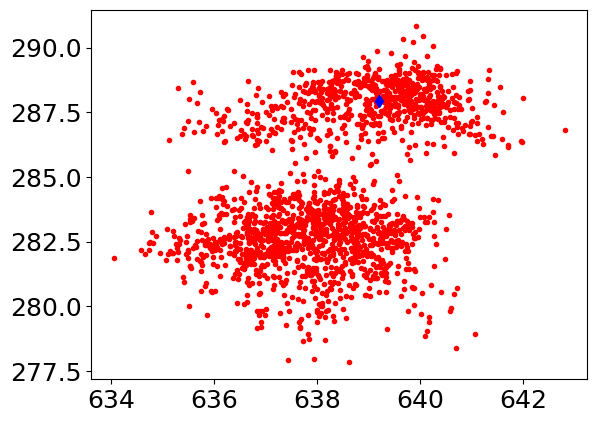

In [144]:
plot(Fsage['/X'][Fsage['/MainHaloID'][:]==MID], Fsage['/Z'][Fsage['/MainHaloID'][:]==MID],'r.')
plot(DMzoom[i,3],DMzoom[i,5],'bd')

# do the plots

Text(0, 0.5, 'z_form(BCG)')

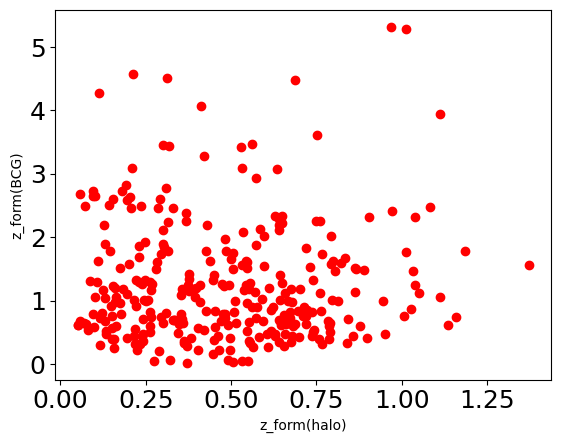

In [48]:
plot(Hfz[Gfz>0],Gfz[Gfz>0],'ro')
xlabelel('z_form(halo)')
ylabel('z_form(BCG)')

# Observation data

In [13]:
Loubser2009=np.array([
[0.97, 0.18],
[0.58, 0.18],
[0.81, 0.23],
[0.63, 0.43],
[0.89, 0.22],
[1.25, 0.20],
[0.85, 0.13],
[0.75, 0.38],
[1.12, 0.19],
[0.66, 0.37],
[0.70, 0.15],
[0.94, 0.19],
[1.01, 0.23],
[0.92, 0.32],
[1.05, 0.21],
[1.25, 0.10],
[0.66, 0.55],
[0.93, 0.10],
[1.03, 0.34],
[0.93, 0.02],
[0.94, 0.27],
[1.10, 0.17],
[1.07, 0.12],
[0.89, 0.12],
[0.92, 0.04],
[0.92, 0.07],
[1.00, 0.14],
[1.05, 0.06],
[0.90, 0.14],
[0.95, 0.08],
[0.69, 0.19],
[0.67, 0.29],
[0.86, 0.11],
[0.92, 0.13],
[1.02, 0.24],
[0.90, 0.20],
[0.63, 0.19],
[0.63, 0.40],
[0.69, 0.37],
[0.91, 0.27],
[0.99, 0.17],
[0.88, 0.34],
[0.93, 0.21]])

Loubser2009[:,0]=10**Loubser2009[:,0]
Loubser2009[Loubser2009[:,0]>13.,0]=12.
Loubser2009[:,0].mean(),np.median(Loubser2009[:,0])

(8.074293022770517, 8.31763771102671)

In [9]:
from astropy.cosmology import Planck15, z_at_value

In [10]:
import astropy.units as u
z_at_value(Planck15.age, 1 * u.Gyr) , Planck15.age(0)

(<Quantity 5.67584776 redshift>, <Quantity 13.7976159 Gyr>)

In [11]:
#functions for second axis
def age2red(x):
    if len(x) >0:
#         rearr=np.copy(x)
#         rearr[x<0.0006]=0 
#         rearr[x>=Planck15.age(0)]=1.0e3
#         ids=np.where((x>0.0006)&(x<13.863))[0]
#         for i in ids:
#             rearr[i]=z_at_value(Planck15.age, Planck15.age(0)-x[i] * u.Gyr)
#         return rearr
        rearr=np.array([z_at_value(Planck15.age, Planck15.age(0)-(0.000001+i) * u.Gyr).value  for i in x])
#         print(x,rearr)
        return rearr
    else:
        return z_at_value(Planck15.age, Planck15.age(0)- (0.000001+x) * u.Gyr).value
def red2age(x):
    if len(x)>0:
        return Planck15.age(0).value-Planck15.age(x).value
    else:
#         print(x)
        return 0

In [19]:
z_at_value(Planck15.age, Planck15.age(0)-10 * u.Gyr).value

1.7150201564733574

In [23]:
GXred=[z_at_value(Planck15.age, Planck15.age(0)-i * u.Gyr).value  for i in GXCshr[:,8]]
GZred=[z_at_value(Planck15.age, Planck15.age(0)-i * u.Gyr).value  for i in GZCshr[:,8]]

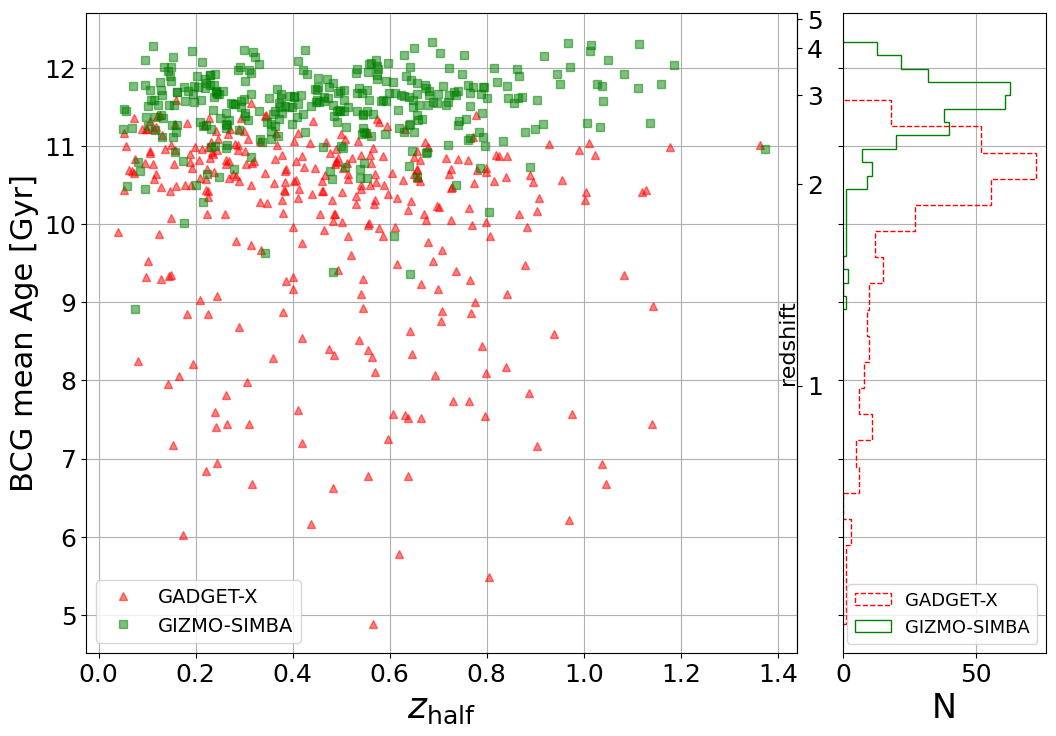

In [15]:
fig=figure(figsize=(12,8))
gs = fig.add_gridspec(1, 2,  width_ratios=(7, 2), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.025)
ax1 = fig.add_subplot(gs[0, 0])

# fig, ax1 = subplots(constrained_layout=True)

ax1.plot(GHfz, GXCshr[:,8],'r^',alpha=0.5, label='GADGET-X')
ax1.plot(Hfz, GZCshr[:,8],'gs',alpha=0.5, label='GIZMO-SIMBA')
# ax1.plot(MDPL2Hfz, Galc, 'kx', alpha=0.5, label='GALACTICUS')
# ax1.plot(MDPL2Hfz, Sag, 'c+', alpha=0.5, label='SAG')
# ax1.plot(MDPL2Hfz, Sage, 'mx', alpha=0.5, label='SAGE')

ax1.set_xlabel(r'$z_{\rm half}$',fontsize=26)
ax1.set_ylabel('BCG mean Age [Gyr]',fontsize=22)
ax1.grid()
# ylim(5.5,12.9)
ax1.legend(fontsize=14)

secaxy = ax1.secondary_yaxis('right', functions=(age2red,red2age))
# secaxy.set_ylabel(r'redshift',fontsize=12)
ax1.text(1.4,8, 'redshift', rotation=90, fontsize=16)

ax_histy = fig.add_subplot(gs[0, 1], sharey=ax1)
ax_histy.hist(GXCshr[:,8],bins=20,orientation='horizontal',histtype='step',linestyle=('dashed'),color='r', label='GADGET-X')
ax_histy.hist(GZCshr[:,8],bins=20,orientation='horizontal',histtype='step',linestyle=('solid'),color='g', label='GIZMO-SIMBA')
# ax_histy.hist(Sag,bins=20,orientation='horizontal',histtype='step',linestyle=('dotted'),color='c', label='SAG')
# ax_histy.hist(Sage,bins=20,orientation='horizontal',histtype='step',linestyle=('dashdot'),color='m', label='SAGE')
# ax_histy.hist(Loubser2009[:,0],orientation='horizontal',histtype='step',density=True,linestyle=('dotted'),color='k', label='L+09')

ax_histy.tick_params(axis="y", labelleft=False)
# ax_histy.plot([0,290],[0.1,0.1],'c:')
ax_histy.grid()
ax_histy.legend(fontsize=13,loc=4)
ax_histy.set_xlabel('N', fontsize=24)

savefig('plots/z_form-BCG_age.pdf',dpi=300)

# richness -- halo formation time

In [14]:
# gizmo richness
GZS_richness=np.zeros((324,3),dtype=np.int32)
tmd=np.load('data/GZS-galaxies-info-caesar_nodust.npy')
tmd=tmd[tmd[:,2]!=1,:]
for i in np.arange(1,325):
    GZS_richness[i-1,0]=tmd[(tmd[:,0]==i)&(tmd[:,1]>10**9.5),0].size
    GZS_richness[i-1,1]=tmd[(tmd[:,0]==i)&(tmd[:,1]>10**10),0].size
    GZS_richness[i-1,2]=tmd[(tmd[:,0]==i)&(tmd[:,1]>10**10.5),0].size
GZS_richness

array([[446, 331, 127],
       [403, 298,  87],
       [326, 252,  89],
       [304, 232,  95],
       [333, 259,  95],
       [363, 265, 104],
       [289, 223,  64],
       [249, 200,  80],
       [310, 236,  67],
       [265, 199,  69],
       [229, 180,  60],
       [240, 182,  65],
       [240, 178,  79],
       [252, 174,  61],
       [271, 193,  66],
       [277, 210,  96],
       [226, 170,  64],
       [236, 168,  45],
       [242, 194,  68],
       [224, 166,  57],
       [215, 159,  66],
       [155, 113,  38],
       [246, 199,  83],
       [246, 180,  78],
       [184, 134,  46],
       [227, 168,  63],
       [264, 186,  79],
       [207, 163,  67],
       [224, 175,  63],
       [237, 176,  49],
       [200, 152,  63],
       [236, 177,  65],
       [219, 170,  64],
       [226, 182,  65],
       [208, 159,  70],
       [224, 170,  66],
       [195, 148,  55],
       [103,  74,  23],
       [216, 169,  52],
       [175, 127,  45],
       [222, 164,  55],
       [219, 160

In [20]:
# g3x richness
GXS_richness=np.zeros((324,3),dtype=np.int32)
tmd=np.load('data/G3X-galaxies-info-caesar.npy')
tmd=tmd[tmd[:,2]!=1,:]
for i in np.arange(1,325):
    GXS_richness[i-1,0]=tmd[(tmd[:,0]==i)&(tmd[:,1]>10**9.5),0].size
    GXS_richness[i-1,1]=tmd[(tmd[:,0]==i)&(tmd[:,1]>10**10),0].size
    GXS_richness[i-1,2]=tmd[(tmd[:,0]==i)&(tmd[:,1]>10**10.5),0].size
GXS_richness

array([[581, 418, 155],
       [492, 353, 125],
       [456, 315, 107],
       [413, 302, 105],
       [457, 316, 109],
       [468, 339, 118],
       [359, 258,  89],
       [464, 339, 127],
       [379, 267,  94],
       [314, 221,  79],
       [299, 218,  89],
       [333, 245,  89],
       [328, 231,  92],
       [304, 205,  69],
       [361, 246,  86],
       [383, 276,  94],
       [292, 205,  77],
       [301, 214,  71],
       [316, 223,  79],
       [269, 196,  74],
       [298, 206,  83],
       [181, 132,  53],
       [325, 240,  79],
       [287, 208,  79],
       [249, 169,  62],
       [278, 189,  75],
       [339, 248,  89],
       [252, 184,  78],
       [290, 212,  77],
       [323, 212,  70],
       [267, 185,  75],
       [300, 207,  80],
       [281, 197,  73],
       [324, 221,  75],
       [288, 199,  78],
       [278, 199,  71],
       [260, 187,  73],
       [151, 112,  43],
       [270, 191,  69],
       [224, 166,  56],
       [265, 189,  70],
       [284, 214

In [25]:
import scipy

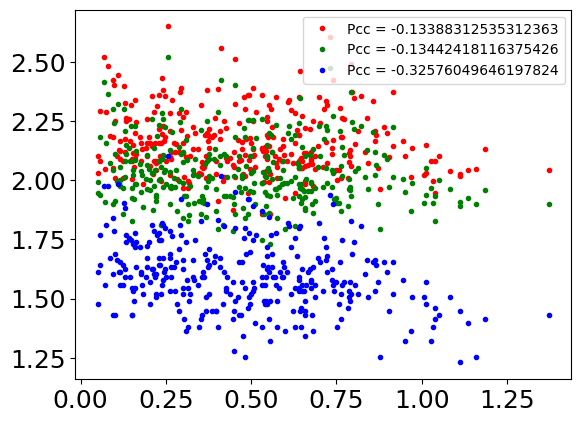

In [27]:
plot(Hfz,np.log10(GZS_richness[:,0]),'r.', label='Pcc = '+ str(scipy.stats.pearsonr(Hfz, np.log10(GZS_richness[:,0]))[0]))
plot(Hfz,np.log10(GZS_richness[:,1]),'g.', label='Pcc = '+ str(scipy.stats.pearsonr(Hfz, np.log10(GZS_richness[:,1]))[0]))
plot(Hfz,np.log10(GZS_richness[:,2]),'b.', label='Pcc = '+ str(scipy.stats.pearsonr(Hfz, np.log10(GZS_richness[:,2]))[0]))
legend()

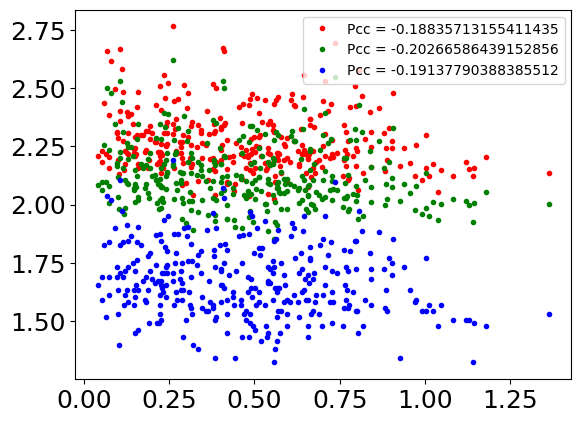

In [29]:
plot(GHfz,np.log10(GXS_richness[:,0]),'r.', label='Pcc = '+ str(scipy.stats.pearsonr(GHfz, np.log10(GXS_richness[:,0]))[0]))
plot(GHfz,np.log10(GXS_richness[:,1]),'g.', label='Pcc = '+ str(scipy.stats.pearsonr(GHfz, np.log10(GXS_richness[:,1]))[0]))
plot(GHfz,np.log10(GXS_richness[:,2]),'b.', label='Pcc = '+ str(scipy.stats.pearsonr(GHfz, np.log10(GXS_richness[:,2]))[0]))
legend()

# need to check age metal M* Mh relations -- funamental plane??

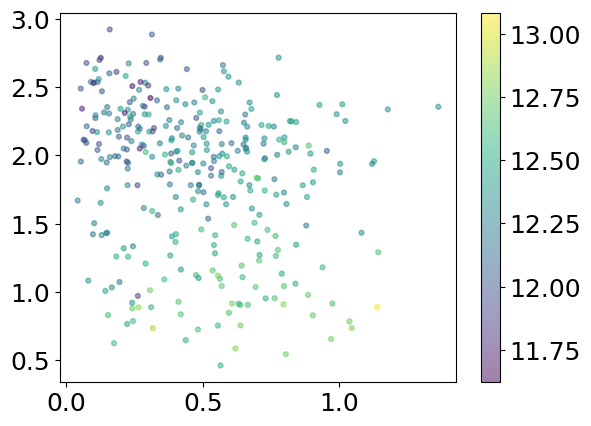

In [ ]:
scatter(GHfz, GXred, s=np.log10(GXCshr[:,1]), c=np.log10(GXCshr[:,1]),alpha=0.5)
# plot(Hfz, GZred,'gs',alpha=0.5)
colorbar()

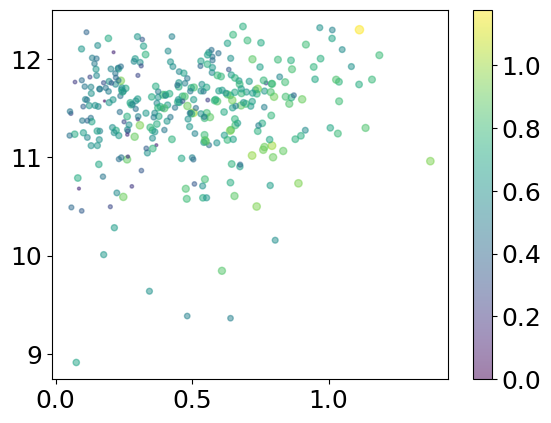

In [181]:
scatter(Hfz,GZCshr[:,8],s=np.log10(GZCshr[:,1]/GZCshr[:,1].min())*30, c=np.log10(GZCshr[:,1]/GZCshr[:,1].min()),alpha=0.5)
colorbar()

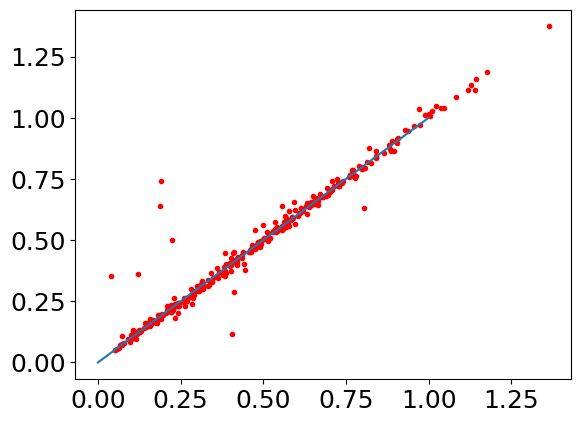

In [93]:
plot(GHfz,Hfz,'r.')
plot([0,1],[0,1])